<a href="https://colab.research.google.com/github/irvincarrasco/Challenge3_ONE_TelecomX_Parte2/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

# Aplanar columnas anidadas
df_normalizado = df.join(pd.json_normalize(df['customer'])).drop(columns=['customer'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['phone'])).drop(columns=['phone'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['internet'])).drop(columns=['internet'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['account'])).drop(columns=['account'])

# Convertir nombres columnas a minúsculas
df_normalizado.columns = df_normalizado.columns.str.lower()

# Limpiar y corregir valores de ciertas columnas
def clean_replace_col(df, col_name):
    if col_name in df.columns:
        df[col_name] = df[col_name].astype(str).str.lower().str.strip()
        df[col_name] = df[col_name].replace({'no internet service': 'no'})

for col in ['onlinebackup', 'onlinesecurity']:
    clean_replace_col(df_normalizado, col)

# Renombrar columnas para mayor claridad
renombrar_cols = {
    'churn': 'evasion',
    'charges.monthly': 'facturacion_mensual',
    'charges.total': 'facturacion_total',
    'tenure': 'meses_cliente',
    'contract': 'contrato',
    'paymentmethod': 'metodo_pago',
    'onlinebackup': 'backup_online',
    'onlinesecurity': 'seguridad_online',
    'deviceprotection': 'proteccion_dispositivos',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'streaming_tv',
    'streamingmovies': 'streaming_peliculas',
}
df_normalizado.rename(columns=renombrar_cols, inplace=True)

# Limpiar y mapear columna 'evasion' a binario
df_normalizado['evasion'] = df_normalizado['evasion'].astype(str).str.lower().str.strip()
df_normalizado['evasion'] = df_normalizado['evasion'].map({'yes': 1, 'no': 0})

# Eliminar filas sin valor válido en 'evasion'
df_normalizado = df_normalizado.dropna(subset=['evasion'])
df_normalizado['evasion'] = df_normalizado['evasion'].astype(int)

# Crear columna facturacion_diaria
if 'facturacion_mensual' in df_normalizado.columns:
    df_normalizado['facturacion_mensual'] = pd.to_numeric(df_normalizado['facturacion_mensual'], errors='coerce')
    df_normalizado['facturacion_diaria'] = df_normalizado['facturacion_mensual'] / 30

# Definir variables numéricas a analizar (si existen)
variables_num = [col for col in ['facturacion_mensual', 'facturacion_total', 'meses_cliente', 'facturacion_diaria'] if col in df_normalizado.columns]

# Convertir variables numéricas a float
for col in variables_num:
    df_normalizado[col] = pd.to_numeric(df_normalizado[col], errors='coerce')

# Eliminar filas con nulos en columnas numéricas y en evasión (ya limpio, pero para asegurar)
df_normalizado = df_normalizado.dropna(subset=variables_num + ['evasion'])

print(f"📊 Dimensiones del archivo: {df_normalizado.shape[0]} filas, {df_normalizado.shape[1]} columnas")
print(f"📋 Columnas disponibles: {list(df_normalizado.columns)}")

📊 Dimensiones del archivo: 7032 filas, 22 columnas
📋 Columnas disponibles: ['customerid', 'evasion', 'gender', 'seniorcitizen', 'partner', 'dependents', 'meses_cliente', 'phoneservice', 'multiplelines', 'internetservice', 'seguridad_online', 'backup_online', 'proteccion_dispositivos', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'contrato', 'paperlessbilling', 'metodo_pago', 'facturacion_mensual', 'facturacion_total', 'facturacion_diaria']


In [3]:
# Exportar a CSV
nombre_archivo = 'telecomx_procesado.csv'
df_normalizado.to_csv(nombre_archivo, index=False, encoding='utf-8')
print(f"✅ Datos exportados exitosamente a: {nombre_archivo}")

✅ Datos exportados exitosamente a: telecomx_procesado.csv


In [4]:
import pandas as pd
import numpy as np

# 📂 Extracción del Archivo Tratado
print("🔄 Cargando archivo CSV tratado...")

# Cargar el archivo CSV procesado
# Asegúrate de que el nombre del archivo coincida con el que exportaste
nombre_archivo = 'telecomx_procesado.csv'  # Cambia por tu nombre de archivo

try:
    df = pd.read_csv(nombre_archivo, encoding='utf-8')
    print(f"✅ Archivo cargado exitosamente: {nombre_archivo}")

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo '{nombre_archivo}'")
    print("💡 Verifica que el archivo esté en la misma carpeta que tu script")
    print("💡 O ajusta la ruta del archivo")

except Exception as e:
    print(f"❌ Error al cargar el archivo: {e}")

# 📊 Información básica del dataset
print("\n" + "="*50)
print("📊 INFORMACIÓN DEL DATASET TRATADO")
print("="*50)

print(f"📐 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\n📋 Columnas disponibles ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🎯 Tipos de datos:")
print(df.dtypes)

print(f"\n📈 Información general:")
df.info()

# 📊 Vista previa de los datos
print("\n" + "="*50)
print("👀 VISTA PREVIA DE LOS DATOS")
print("="*50)

print("\n🔝 Primeras 5 filas:")
print(df.head())

print("\n🔻 Últimas 5 filas:")
print(df.tail())

# 🔍 Verificación de la calidad de los datos tratados
print("\n" + "="*50)
print("🔍 VERIFICACIÓN DE CALIDAD DE DATOS")
print("="*50)

print("\n❓ Valores nulos por columna:")
nulos = df.isnull().sum()
print(nulos[nulos > 0] if nulos.sum() > 0 else "✅ No hay valores nulos")

print("\n📊 Estadísticas descriptivas (variables numéricas):")
numericas = df.select_dtypes(include=[np.number])
if not numericas.empty:
    print(numericas.describe())
else:
    print("ℹ️ No se encontraron columnas numéricas")

# 🎯 Verificación específica de la variable objetivo 'evasion'
print("\n" + "="*50)
print("🎯 VERIFICACIÓN DE VARIABLE OBJETIVO")
print("="*50)

if 'evasion' in df.columns:
    print(f"\n📊 Distribución de 'evasion':")
    print(df['evasion'].value_counts())
    print(f"\n📈 Porcentajes:")
    print(df['evasion'].value_counts(normalize=True) * 100)
    print(f"\n✅ Variable 'evasion' encontrada y verificada")
else:
    print("❌ Variable 'evasion' no encontrada en el dataset")
    print("💡 Verifica que el archivo sea el correcto y contenga esta columna")

# 💾 Confirmación de carga exitosa
print("\n" + "="*50)
print("✅ ARCHIVO TRATADO CARGADO EXITOSAMENTE")
print("="*50)
print("🚀 El dataset está listo para el análisis y modelado")
print("💡 Puedes continuar con la siguiente parte del desafío")

🔄 Cargando archivo CSV tratado...
✅ Archivo cargado exitosamente: telecomx_procesado.csv

📊 INFORMACIÓN DEL DATASET TRATADO
📐 Dimensiones: 7032 filas × 22 columnas

📋 Columnas disponibles (22):
   1. customerid
   2. evasion
   3. gender
   4. seniorcitizen
   5. partner
   6. dependents
   7. meses_cliente
   8. phoneservice
   9. multiplelines
  10. internetservice
  11. seguridad_online
  12. backup_online
  13. proteccion_dispositivos
  14. soporte_tecnico
  15. streaming_tv
  16. streaming_peliculas
  17. contrato
  18. paperlessbilling
  19. metodo_pago
  20. facturacion_mensual
  21. facturacion_total
  22. facturacion_diaria

🎯 Tipos de datos:
customerid                  object
evasion                      int64
gender                      object
seniorcitizen                int64
partner                     object
dependents                  object
meses_cliente                int64
phoneservice                object
multiplelines               object
internetservice          

In [5]:
import pandas as pd
import numpy as np

# 🗑️ ELIMINACIÓN DE COLUMNAS IRRELEVANTES
print("🔄 Analizando columnas irrelevantes para modelos predictivos...")
print("="*60)

# Mostrar información inicial del dataset
print(f"📊 Dataset inicial: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"📋 Columnas actuales: {list(df.columns)}")

# 🎯 Definir columnas irrelevantes para análisis predictivo
# Estas columnas típicamente no aportan valor predictivo:

columnas_irrelevantes = []

# 1. Identificadores únicos (no predictivos)
identificadores = [col for col in df.columns if any(keyword in col.lower()
                  for keyword in ['id', 'customerid', 'customer_id', 'index', 'unnamed'])]
columnas_irrelevantes.extend(identificadores)

# 2. Columnas calculadas derivadas que pueden causar data leakage
# Por ejemplo, si tenemos tanto facturación mensual como diaria (derivada)
columnas_derivadas = []
if 'facturacion_mensual' in df.columns and 'facturacion_diaria' in df.columns:
    columnas_derivadas.append('facturacion_diaria')  # Eliminar la derivada
    print("💡 Detectada columna derivada: facturacion_diaria (se eliminará)")

columnas_irrelevantes.extend(columnas_derivadas)

# 3. Columnas con valores únicos o constantes (no aportan información)
columnas_constantes = []
for col in df.columns:
    if df[col].nunique() <= 1:
        columnas_constantes.append(col)
        print(f"⚠️  Columna constante detectada: {col}")

columnas_irrelevantes.extend(columnas_constantes)

# 4. Columnas con alta cardinalidad que no son útiles
columnas_alta_cardinalidad = []
for col in df.columns:
    if df[col].dtype == 'object':  # Solo para columnas categóricas
        if df[col].nunique() > df.shape[0] * 0.9:  # Más del 90% son valores únicos
            columnas_alta_cardinalidad.append(col)
            print(f"⚠️  Columna con alta cardinalidad: {col} ({df[col].nunique()} valores únicos)")

columnas_irrelevantes.extend(columnas_alta_cardinalidad)

# Eliminar duplicados de la lista
columnas_irrelevantes = list(set(columnas_irrelevantes))

# Verificar que no eliminemos la variable objetivo
if 'evasion' in columnas_irrelevantes:
    columnas_irrelevantes.remove('evasion')
    print("🎯 Protegiendo variable objetivo 'evasion' de eliminación")

print("\n" + "="*60)
print("🗑️  COLUMNAS IDENTIFICADAS PARA ELIMINACIÓN")
print("="*60)

if columnas_irrelevantes:
    print(f"📝 Se eliminarán {len(columnas_irrelevantes)} columnas:")
    for i, col in enumerate(columnas_irrelevantes, 1):
        motivo = ""
        if col in identificadores:
            motivo = "(Identificador único)"
        elif col in columnas_derivadas:
            motivo = "(Columna derivada)"
        elif col in columnas_constantes:
            motivo = "(Valores constantes)"
        elif col in columnas_alta_cardinalidad:
            motivo = "(Alta cardinalidad)"

        print(f"  {i:2d}. {col} {motivo}")

    # Confirmar eliminación
    print(f"\n⚠️  ¿Proceder con la eliminación? (Esto mejorará el rendimiento del modelo)")

    # Crear dataset limpio
    df_limpio = df.drop(columns=columnas_irrelevantes)

    print("\n✅ ELIMINACIÓN COMPLETADA")
    print("="*60)
    print(f"📊 Dataset original: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"📊 Dataset limpio:   {df_limpio.shape[0]} filas × {df_limpio.shape[1]} columnas")
    print(f"🗑️  Columnas eliminadas: {len(columnas_irrelevantes)}")
    print(f"✅ Columnas restantes: {len(df_limpio.columns)}")

    print(f"\n📋 Columnas finales para análisis predictivo:")
    for i, col in enumerate(df_limpio.columns, 1):
        tipo_var = "🎯" if col == 'evasion' else "📊" if df_limpio[col].dtype in ['int64', 'float64'] else "📝"
        print(f"  {i:2d}. {tipo_var} {col}")

    # Actualizar el DataFrame principal
    df = df_limpio.copy()

    print(f"\n💡 RECOMENDACIONES:")
    print(f"   • Dataset optimizado para modelos de machine learning")
    print(f"   • Eliminadas columnas que no aportan valor predictivo")
    print(f"   • Reducido riesgo de overfitting por columnas irrelevantes")

else:
    print("✅ No se encontraron columnas irrelevantes para eliminar")
    print("💡 El dataset ya está optimizado para análisis predictivo")

# 📊 Verificación final
print("\n" + "="*60)
print("🔍 VERIFICACIÓN FINAL DEL DATASET LIMPIO")
print("="*60)

print(f"✅ Dimensiones finales: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"🎯 Variable objetivo: {'✅ Presente' if 'evasion' in df.columns else '❌ Ausente'}")
print(f"📊 Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"📝 Variables categóricas: {len(df.select_dtypes(include=['object']).columns)}")

# Vista previa del dataset limpio
print(f"\n👀 Vista previa del dataset optimizado:")
print(df.head(3))

🔄 Analizando columnas irrelevantes para modelos predictivos...
📊 Dataset inicial: 7032 filas × 22 columnas
📋 Columnas actuales: ['customerid', 'evasion', 'gender', 'seniorcitizen', 'partner', 'dependents', 'meses_cliente', 'phoneservice', 'multiplelines', 'internetservice', 'seguridad_online', 'backup_online', 'proteccion_dispositivos', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'contrato', 'paperlessbilling', 'metodo_pago', 'facturacion_mensual', 'facturacion_total', 'facturacion_diaria']
💡 Detectada columna derivada: facturacion_diaria (se eliminará)
⚠️  Columna con alta cardinalidad: customerid (7032 valores únicos)

🗑️  COLUMNAS IDENTIFICADAS PARA ELIMINACIÓN
📝 Se eliminarán 3 columnas:
   1. facturacion_diaria (Columna derivada)
   2. customerid (Identificador único)
   3. seguridad_online (Identificador único)

⚠️  ¿Proceder con la eliminación? (Esto mejorará el rendimiento del modelo)

✅ ELIMINACIÓN COMPLETADA
📊 Dataset original: 7032 filas × 22 columnas
📊 Dataset

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 🔄 ENCODING DE VARIABLES CATEGÓRICAS
print("🔄 Iniciando proceso de encoding de variables categóricas...")
print("="*70)

# 📊 Análisis inicial del dataset
print(f"📊 Dataset actual: {df.shape[0]} filas × {df.shape[1]} columnas")

# Identificar variables categóricas y numéricas
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remover la variable objetivo si está en categóricas (ya debería estar como numérica)
if 'evasion' in variables_categoricas:
    variables_categoricas.remove('evasion')

print(f"\n📊 Variables numéricas ({len(variables_numericas)}): {variables_numericas}")
print(f"📝 Variables categóricas ({len(variables_categoricas)}): {variables_categoricas}")

if not variables_categoricas:
    print("\n✅ No se encontraron variables categóricas para codificar")
    print("💡 El dataset ya está preparado para machine learning")
else:
    # 🔍 Análisis detallado de variables categóricas
    print("\n" + "="*70)
    print("🔍 ANÁLISIS DE VARIABLES CATEGÓRICAS")
    print("="*70)

    for col in variables_categoricas:
        valores_unicos = df[col].nunique()
        print(f"\n📝 {col}:")
        print(f"   • Valores únicos: {valores_unicos}")
        print(f"   • Valores: {list(df[col].unique())}")

        if valores_unicos <= 10:  # Mostrar conteo si no son demasiados valores
            print(f"   • Distribución:")
            distribucion = df[col].value_counts()
            for valor, conteo in distribucion.items():
                porcentaje = (conteo/len(df))*100
                print(f"     - {valor}: {conteo} ({porcentaje:.1f}%)")

    # 🎯 Estrategia de encoding
    print("\n" + "="*70)
    print("🎯 ESTRATEGIA DE ENCODING")
    print("="*70)

    # Separar variables por tipo de encoding recomendado
    variables_binarias = []  # Variables con solo 2 valores únicos
    variables_ordinales = []  # Variables con orden natural
    variables_nominales = []  # Variables sin orden natural

    # Clasificar variables categóricas
    for col in variables_categoricas:
        valores_unicos = df[col].nunique()
        valores = list(df[col].unique())

        if valores_unicos == 2:
            variables_binarias.append(col)
            print(f"🔵 {col}: Variable binaria → Label Encoding")

        # Detectar posibles variables ordinales por nombre
        elif any(keyword in col.lower() for keyword in ['contract', 'contrato']) and valores_unicos <= 5:
            variables_ordinales.append(col)
            print(f"🟡 {col}: Posible variable ordinal → Label/Ordinal Encoding")

        else:
            variables_nominales.append(col)
            if valores_unicos <= 10:
                print(f"🟢 {col}: Variable nominal → One-Hot Encoding")
            else:
                print(f"🔴 {col}: Alta cardinalidad ({valores_unicos}) → Requiere análisis especial")

    # 📋 Crear DataFrame de resultado
    df_encoded = df.copy()

    # 🔵 LABEL ENCODING para variables binarias
    print(f"\n🔵 APLICANDO LABEL ENCODING (Variables binarias)")
    print("-" * 50)

    for col in variables_binarias:
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))

        # Mostrar mapeo
        mapeo = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"✅ {col}: {mapeo}")

        # Eliminar columna original
        df_encoded.drop(columns=[col], inplace=True)

    # 🟡 ORDINAL ENCODING para variables ordinales
    if variables_ordinales:
        print(f"\n🟡 APLICANDO ORDINAL ENCODING (Variables ordinales)")
        print("-" * 50)

        for col in variables_ordinales:
            if 'contrato' in col.lower() or 'contract' in col.lower():
                # Mapeo manual para contratos (asumiendo orden de compromiso)
                orden_contrato = {
                    'month-to-month': 0,
                    'one year': 1,
                    'two year': 2
                }

                # Aplicar mapeo si los valores coinciden
                valores_col = df_encoded[col].str.lower().str.strip()
                if all(v in orden_contrato.keys() for v in valores_col.unique()):
                    df_encoded[col + '_encoded'] = valores_col.map(orden_contrato)
                    print(f"✅ {col}: {orden_contrato}")
                    df_encoded.drop(columns=[col], inplace=True)
                else:
                    # Si no coincide, usar label encoding
                    le = LabelEncoder()
                    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))
                    mapeo = dict(zip(le.classes_, le.transform(le.classes_)))
                    print(f"✅ {col} (auto): {mapeo}")
                    df_encoded.drop(columns=[col], inplace=True)

    # 🟢 ONE-HOT ENCODING para variables nominales
    if variables_nominales:
        print(f"\n🟢 APLICANDO ONE-HOT ENCODING (Variables nominales)")
        print("-" * 50)

        # Filtrar variables con cardinalidad manejable
        variables_onehot = [col for col in variables_nominales if df[col].nunique() <= 10]
        variables_alta_cardinalidad = [col for col in variables_nominales if df[col].nunique() > 10]

        if variables_onehot:
            # Aplicar one-hot encoding
            df_dummies = pd.get_dummies(df_encoded[variables_onehot],
                                      prefix=variables_onehot,
                                      prefix_sep='_',
                                      drop_first=True)  # Evitar multicolinealidad

            # Combinar con dataset principal
            df_encoded = pd.concat([df_encoded, df_dummies], axis=1)

            # Eliminar columnas originales
            df_encoded.drop(columns=variables_onehot, inplace=True)

            print(f"✅ One-hot encoding aplicado a: {variables_onehot}")
            print(f"   • Nuevas columnas creadas: {len(df_dummies.columns)}")
            print(f"   • Columnas nuevas: {list(df_dummies.columns)}")

        # 🔴 Manejo de variables con alta cardinalidad
        if variables_alta_cardinalidad:
            print(f"\n🔴 VARIABLES CON ALTA CARDINALIDAD")
            print("-" * 50)
            print(f"⚠️  Las siguientes variables tienen demasiados valores únicos:")

            for col in variables_alta_cardinalidad:
                print(f"   • {col}: {df[col].nunique()} valores únicos")
                print(f"     Recomendación: Considera agrupar categorías o usar Target Encoding")

                # Opción: Mantener solo las categorías más frecuentes
                top_categorias = df[col].value_counts().head(5).index.tolist()
                df_encoded[col + '_top5'] = df_encoded[col].apply(
                    lambda x: x if x in top_categorias else 'Otros'
                )

                # Aplicar one-hot a la versión reducida
                df_temp = pd.get_dummies(df_encoded[col + '_top5'],
                                       prefix=col,
                                       drop_first=True)
                df_encoded = pd.concat([df_encoded, df_temp], axis=1)

                # Eliminar columnas temporales
                df_encoded.drop(columns=[col, col + '_top5'], inplace=True)

                print(f"   ✅ Aplicado: Top 5 categorías + 'Otros'")

    # 📊 Resultados finales
    print("\n" + "="*70)
    print("📊 RESULTADOS DEL ENCODING")
    print("="*70)

    print(f"📊 Dataset original:  {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"📊 Dataset encoded:   {df_encoded.shape[0]} filas × {df_encoded.shape[1]} columnas")
    print(f"➕ Columnas añadidas: {df_encoded.shape[1] - df.shape[1]}")

    # Verificar tipos de datos finales
    tipos_finales = df_encoded.dtypes.value_counts()
    print(f"\n📊 Tipos de datos finales:")
    for tipo, cantidad in tipos_finales.items():
        print(f"   • {tipo}: {cantidad} columnas")

    # Actualizar dataset principal
    df = df_encoded.copy()

    print(f"\n✅ ENCODING COMPLETADO EXITOSAMENTE")
    print(f"🎯 Dataset preparado para algoritmos de machine learning")
    print(f"💡 Todas las variables son ahora numéricas")

# 🔍 Verificación final
print(f"\n👀 Vista previa del dataset encoded:")
print(df.head(3))

print(f"\n📋 Columnas finales ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    tipo_icono = "🎯" if col == 'evasion' else "📊"
    print(f"  {i:2d}. {tipo_icono} {col}")

🔄 Iniciando proceso de encoding de variables categóricas...
📊 Dataset actual: 7032 filas × 19 columnas

📊 Variables numéricas (5): ['evasion', 'seniorcitizen', 'meses_cliente', 'facturacion_mensual', 'facturacion_total']
📝 Variables categóricas (14): ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'backup_online', 'proteccion_dispositivos', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'contrato', 'paperlessbilling', 'metodo_pago']

🔍 ANÁLISIS DE VARIABLES CATEGÓRICAS

📝 gender:
   • Valores únicos: 2
   • Valores: ['Female', 'Male']
   • Distribución:
     - Male: 3549 (50.5%)
     - Female: 3483 (49.5%)

📝 partner:
   • Valores únicos: 2
   • Valores: ['Yes', 'No']
   • Distribución:
     - No: 3639 (51.7%)
     - Yes: 3393 (48.3%)

📝 dependents:
   • Valores únicos: 2
   • Valores: ['Yes', 'No']
   • Distribución:
     - No: 4933 (70.2%)
     - Yes: 2099 (29.8%)

📝 phoneservice:
   • Valores únicos: 2
   • Valores: ['Yes', 'No']
  

📊 Analizando proporción de cancelación en el dataset...
🎯 Variable objetivo: 'evasion'
📊 Total de registros: 7,032

📋 Conteo absoluto por clase:
----------------------------------------
   0: 5,163 clientes (No cancelaron (Activos))
   1: 1,869 clientes (Cancelaron (Churn))

📊 Proporción y porcentajes:
----------------------------------------
   📈 Clientes Activos (0):    5,163 (73.42%)
   📉 Clientes que Cancelaron: 1,869 (26.58%)

🎯 Análisis de desbalance:
----------------------------------------
   📊 Ratio Activos:Churn = 2.76:1
   📊 Por cada cliente que cancela, 2.8 permanecen activos
   🏷️  Clasificación: ⚠️  LIGERAMENTE DESBALANCEADO

📈 Impacto potencial en modelos predictivos:
--------------------------------------------------
   ⚠️  Impacto leve: Considerar métricas balanceadas
   💡 Métricas: Usar F1-Score, AUC-ROC además de accuracy

📊 Estadísticas adicionales:
----------------------------------------
   📋 Tipo de datos: int64
   🔍 Valores únicos: 2
   ❓ Valores nulos: 0
   📏 R

/tmp/ipython-input-3650958974.py:177: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3650958974.py:177: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3650958974.py:177: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3650958974.py:177: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3650958974.py:177: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3650958974.py:177: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3650958974.py:177: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-inpu

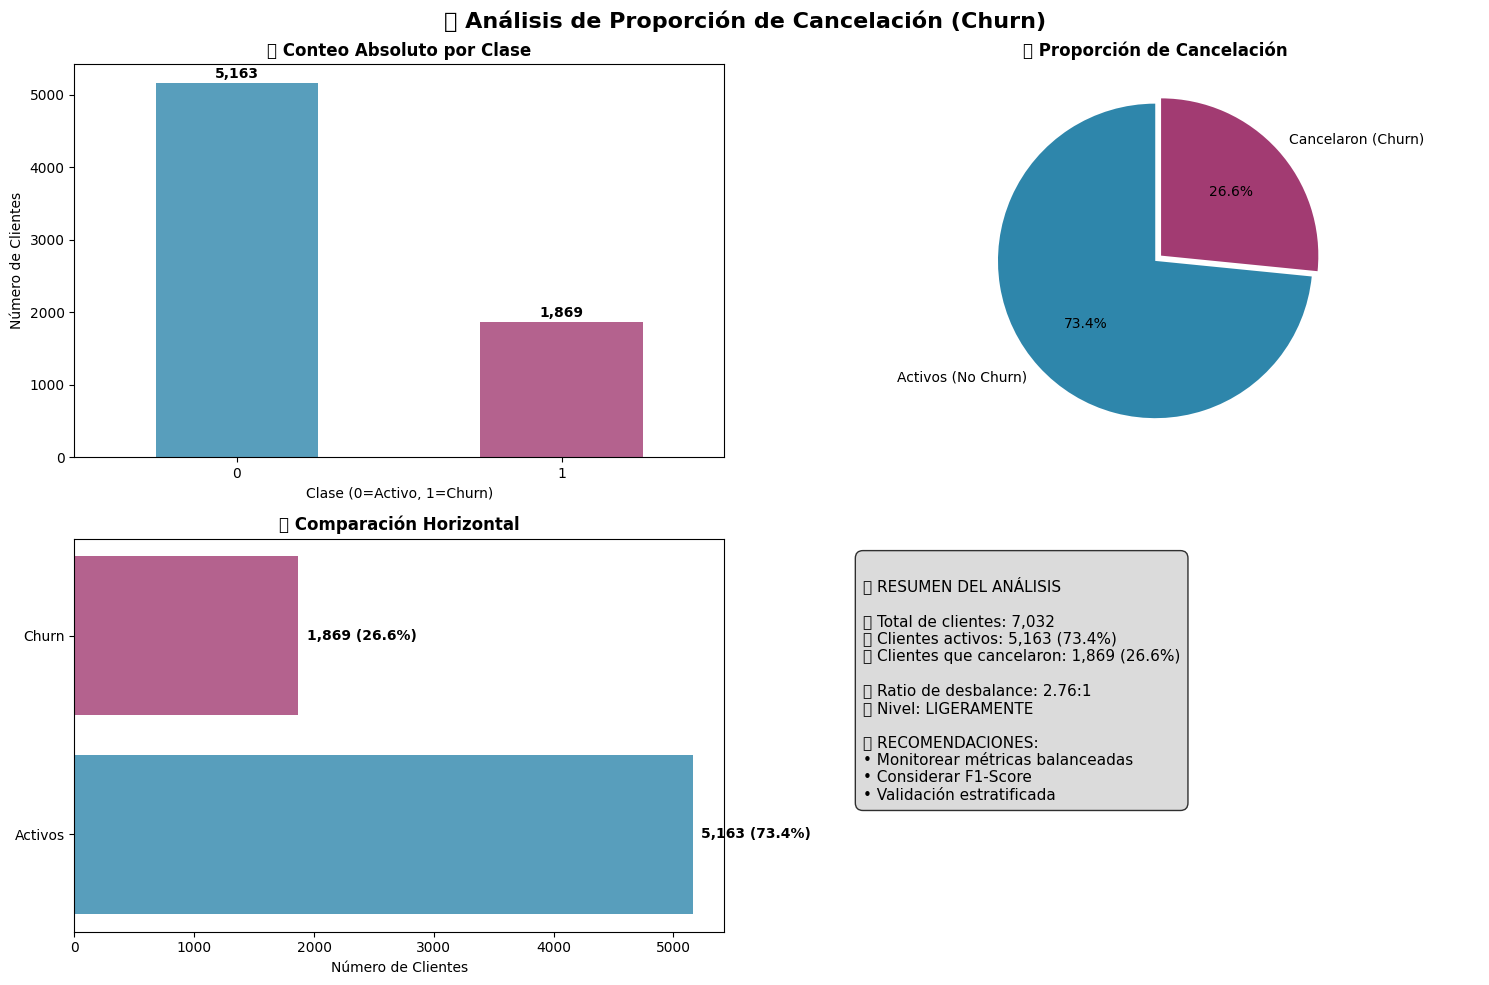


💡 RECOMENDACIONES ESPECÍFICAS PARA ESTE DATASET:
⚠️  LIGERO DESBALANCE:
   • Usa validación cruzada estratificada
   • Monitorea F1-Score además de accuracy
   • Considera class_weight='balanced' en sklearn

✅ Análisis de proporción completado exitosamente
🎯 Dataset analizado y caracterizado para modelado predictivo


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 📊 VERIFICACIÓN DE LA PROPORCIÓN DE CANCELACIÓN (CHURN)
print("📊 Analizando proporción de cancelación en el dataset...")
print("="*70)

# Verificar que existe la variable objetivo
if 'evasion' not in df.columns:
    print("❌ Error: Variable 'evasion' no encontrada en el dataset")
    print("💡 Verifica que el encoding se haya completado correctamente")
else:
    # 📈 ANÁLISIS BÁSICO DE LA VARIABLE OBJETIVO
    print(f"🎯 Variable objetivo: 'evasion'")
    print(f"📊 Total de registros: {len(df):,}")

    # Conteo absoluto de clases
    conteo_clases = df['evasion'].value_counts().sort_index()
    print(f"\n📋 Conteo absoluto por clase:")
    print("-" * 40)

    etiquetas = {0: "No cancelaron (Activos)", 1: "Cancelaron (Churn)"}

    for clase, cantidad in conteo_clases.items():
        etiqueta = etiquetas.get(clase, f"Clase {clase}")
        print(f"   {clase}: {cantidad:,} clientes ({etiqueta})")

    # 📊 PROPORCIÓN Y PORCENTAJES
    print(f"\n📊 Proporción y porcentajes:")
    print("-" * 40)

    proporcion_clases = df['evasion'].value_counts(normalize=True).sort_index()

    no_churn = conteo_clases[0]
    churn = conteo_clases[1] if 1 in conteo_clases else 0

    porcentaje_no_churn = (no_churn / len(df)) * 100
    porcentaje_churn = (churn / len(df)) * 100

    print(f"   📈 Clientes Activos (0):    {no_churn:,} ({porcentaje_no_churn:.2f}%)")
    print(f"   📉 Clientes que Cancelaron: {churn:,} ({porcentaje_churn:.2f}%)")

    # 🎯 RATIO DE DESBALANCE
    print(f"\n🎯 Análisis de desbalance:")
    print("-" * 40)

    if churn > 0:
        ratio_desbalance = no_churn / churn
        print(f"   📊 Ratio Activos:Churn = {ratio_desbalance:.2f}:1")
        print(f"   📊 Por cada cliente que cancela, {ratio_desbalance:.1f} permanecen activos")

        # Clasificar nivel de desbalance
        if ratio_desbalance <= 1.5:
            nivel_desbalance = "✅ BALANCEADO"
            color_nivel = "green"
        elif ratio_desbalance <= 3:
            nivel_desbalance = "⚠️  LIGERAMENTE DESBALANCEADO"
            color_nivel = "orange"
        elif ratio_desbalance <= 9:
            nivel_desbalance = "🔴 MODERADAMENTE DESBALANCEADO"
            color_nivel = "red"
        else:
            nivel_desbalance = "🚨 ALTAMENTE DESBALANCEADO"
            color_nivel = "darkred"

        print(f"   🏷️  Clasificación: {nivel_desbalance}")

        # 📊 IMPACTO EN MODELOS PREDICTIVOS
        print(f"\n📈 Impacto potencial en modelos predictivos:")
        print("-" * 50)

        if ratio_desbalance <= 1.5:
            print("   ✅ Impacto mínimo: Los modelos deberían funcionar bien")
            print("   💡 Métricas: Accuracy, Precision, Recall serán confiables")
        elif ratio_desbalance <= 3:
            print("   ⚠️  Impacto leve: Considerar métricas balanceadas")
            print("   💡 Métricas: Usar F1-Score, AUC-ROC además de accuracy")
        elif ratio_desbalance <= 9:
            print("   🔴 Impacto moderado: Requiere técnicas de balanceo")
            print("   💡 Técnicas: SMOTE, class_weight, threshold tuning")
            print("   📊 Métricas: F1-Score, Precision-Recall, AUC-ROC")
        else:
            print("   🚨 Impacto alto: Desbalance crítico")
            print("   💡 Técnicas: SMOTE, Random Under/Over Sampling")
            print("   📊 Métricas: Precision-Recall curve, Stratified sampling")

    else:
        print("   ❌ No se encontraron casos de churn en el dataset")

    # 📊 ESTADÍSTICAS ADICIONALES
    print(f"\n📊 Estadísticas adicionales:")
    print("-" * 40)

    print(f"   📋 Tipo de datos: {df['evasion'].dtype}")
    print(f"   🔍 Valores únicos: {df['evasion'].nunique()}")
    print(f"   ❓ Valores nulos: {df['evasion'].isnull().sum()}")
    print(f"   📏 Rango de valores: [{df['evasion'].min()}, {df['evasion'].max()}]")

    # 🎨 VISUALIZACIÓN
    print(f"\n🎨 Generando visualizaciones...")

    # Configurar estilo
    plt.style.use('default')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('📊 Análisis de Proporción de Cancelación (Churn)',
                 fontsize=16, fontweight='bold', y=0.98)

    # 1. Gráfico de barras - Conteo absoluto
    colores = ['#2E86AB', '#A23B72']
    conteo_clases.plot(kind='bar', ax=ax1, color=colores, alpha=0.8)
    ax1.set_title('📊 Conteo Absoluto por Clase', fontweight='bold')
    ax1.set_xlabel('Clase (0=Activo, 1=Churn)')
    ax1.set_ylabel('Número de Clientes')
    ax1.tick_params(rotation=0)

    # Añadir etiquetas a las barras
    for i, v in enumerate(conteo_clases.values):
        ax1.text(i, v + len(df)*0.01, f'{v:,}', ha='center', fontweight='bold')

    # 2. Gráfico circular - Proporción
    labels = ['Activos (No Churn)', 'Cancelaron (Churn)']
    sizes = [porcentaje_no_churn, porcentaje_churn]

    wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colores,
                                       autopct='%1.1f%%', startangle=90,
                                       explode=(0, 0.05))
    ax2.set_title('🥧 Proporción de Cancelación', fontweight='bold')

    # 3. Gráfico horizontal - Comparación visual
    categories = ['Activos', 'Churn']
    values = [no_churn, churn]

    bars = ax3.barh(categories, values, color=colores, alpha=0.8)
    ax3.set_title('📊 Comparación Horizontal', fontweight='bold')
    ax3.set_xlabel('Número de Clientes')

    # Añadir etiquetas
    for i, (bar, val) in enumerate(zip(bars, values)):
        ax3.text(val + len(df)*0.01, i, f'{val:,} ({(val/len(df)*100):.1f}%)',
                va='center', fontweight='bold')

    # 4. Métrica de desbalance
    ax4.axis('off')  # Sin ejes

    # Crear texto informativo
    info_text = f"""
🎯 RESUMEN DEL ANÁLISIS

📊 Total de clientes: {len(df):,}
📈 Clientes activos: {no_churn:,} ({porcentaje_no_churn:.1f}%)
📉 Clientes que cancelaron: {churn:,} ({porcentaje_churn:.1f}%)

🔢 Ratio de desbalance: {ratio_desbalance:.2f}:1
🏷️ Nivel: {nivel_desbalance.split()[1] if len(nivel_desbalance.split()) > 1 else nivel_desbalance}

💡 RECOMENDACIONES:
"""

    if ratio_desbalance <= 1.5:
        recomendacion = "• Dataset bien balanceado\n• Usar métricas estándar\n• Modelos funcionarán bien"
    elif ratio_desbalance <= 3:
        recomendacion = "• Monitorear métricas balanceadas\n• Considerar F1-Score\n• Validación estratificada"
    elif ratio_desbalance <= 9:
        recomendacion = "• Aplicar técnicas de balanceo\n• Usar SMOTE o class_weight\n• Focus en Precision-Recall"
    else:
        recomendacion = "• Balanceo crítico necesario\n• Sampling techniques\n• Métricas especializadas"

    info_text += recomendacion

    ax4.text(0.05, 0.95, info_text, transform=ax4.transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5",
             facecolor="lightgray", alpha=0.8))

    plt.tight_layout()
    plt.show()

    # 📋 RECOMENDACIONES ESPECÍFICAS
    print(f"\n💡 RECOMENDACIONES ESPECÍFICAS PARA ESTE DATASET:")
    print("="*70)

    if ratio_desbalance <= 1.5:
        print("✅ DATASET BALANCEADO:")
        print("   • Procede con modelos estándar (Logistic Regression, Random Forest)")
        print("   • Usa accuracy como métrica principal")
        print("   • Aplicar validación cruzada normal")

    elif ratio_desbalance <= 3:
        print("⚠️  LIGERO DESBALANCE:")
        print("   • Usa validación cruzada estratificada")
        print("   • Monitorea F1-Score además de accuracy")
        print("   • Considera class_weight='balanced' en sklearn")

    elif ratio_desbalance <= 9:
        print("🔴 DESBALANCE MODERADO:")
        print("   • Implementa SMOTE para oversampling")
        print("   • Usa class_weight='balanced'")
        print("   • Prioriza Precision-Recall curve")
        print("   • Considera threshold tuning")

    else:
        print("🚨 DESBALANCE CRÍTICO:")
        print("   • SMOTE + Random Undersampling")
        print("   • Ensemble methods con balanceo")
        print("   • Cost-sensitive learning")
        print("   • Stratified sampling obligatorio")

    print(f"\n✅ Análisis de proporción completado exitosamente")
    print(f"🎯 Dataset analizado y caracterizado para modelado predictivo")

📊 Generando matriz de correlación...

🎯 CORRELACIONES CON LA CANCELACIÓN (EVASION):
 1. contrato_encoded          | -0.396 | Moderada Negativa
 2. meses_cliente             | -0.354 | Moderada Negativa
 3. internetservice_Fiber optic | +0.307 | Moderada Positiva
 4. metodo_pago_Electronic check | +0.301 | Moderada Positiva
 5. internetservice_No        | -0.228 | Débil Negativa
 6. soporte_tecnico_No internet service | -0.228 | Débil Negativa
 7. proteccion_dispositivos_No internet service | -0.228 | Débil Negativa
 8. streaming_tv_No internet service | -0.228 | Débil Negativa
 9. streaming_peliculas_No internet service | -0.228 | Débil Negativa
10. facturacion_total         | -0.199 | Débil Negativa


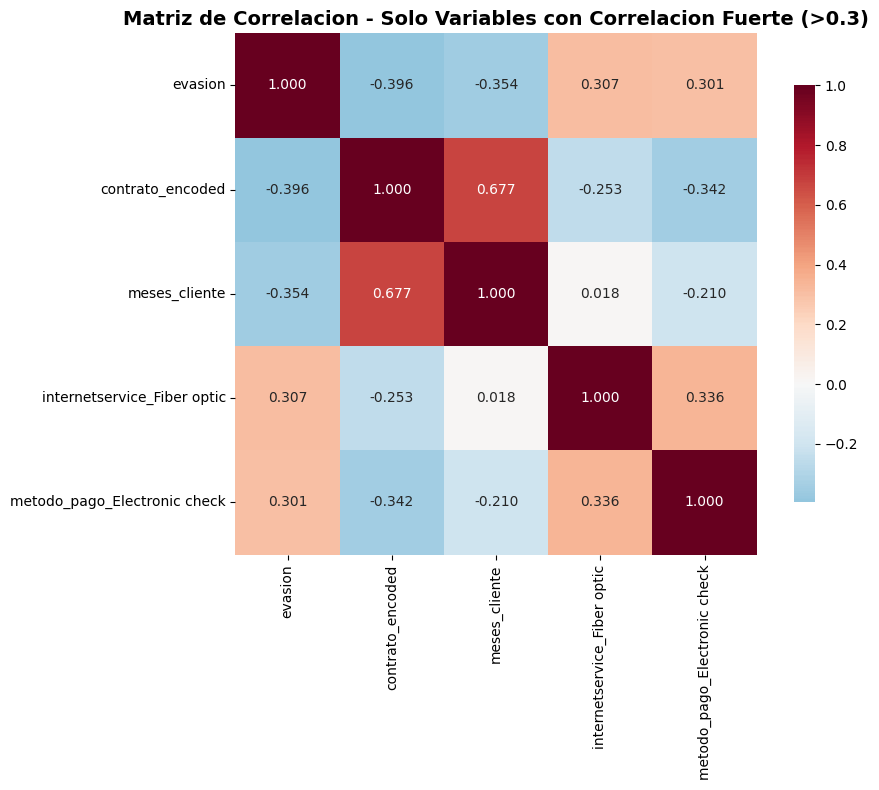


🚀 VARIABLES CANDIDATAS PARA MODELO PREDICTIVO:
CORRELACIÓN FUERTE (>0.3):
   • contrato_encoded: -0.396
   • meses_cliente: -0.354
   • internetservice_Fiber optic: +0.307
   • metodo_pago_Electronic check: +0.301

CORRELACIÓN MODERADA (0.1-0.3):
   • internetservice_No: -0.228
   • soporte_tecnico_No internet service: -0.228
   • proteccion_dispositivos_No internet service: -0.228
   • streaming_tv_No internet service: -0.228
   • streaming_peliculas_No internet service: -0.228
   • facturacion_total: -0.199
   • facturacion_mensual: +0.193
   • paperlessbilling_encoded: +0.191
   • soporte_tecnico_Yes: -0.165
   • dependents_encoded: -0.163
   • seniorcitizen: +0.151
   • partner_encoded: -0.150
   • metodo_pago_Credit card (automatic): -0.135

💡 Total de variables con correlación relevante: 17


In [11]:
# 🔇 Suprimir warnings de emojis en matplotlib
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# También puedes usar solo texto sin emojis en títulos de gráficos:
# Ejemplo para el código de correlación modificado:

# 📊 ANÁLISIS DE CORRELACIÓN (SIN EMOJIS EN GRÁFICOS)
print("📊 Generando matriz de correlación...")

# Calcular matriz de correlación
correlation_matrix = df.corr()

# 🎯 Correlaciones con la variable objetivo 'evasion'
print("\n🎯 CORRELACIONES CON LA CANCELACIÓN (EVASION):")
print("="*60)

correlacion_evasion = correlation_matrix['evasion'].abs().sort_values(ascending=False)
correlacion_evasion_original = correlation_matrix['evasion'].sort_values(ascending=False)

# Mostrar top correlaciones (excluyendo la variable consigo misma)
top_correlaciones = correlacion_evasion[1:11]  # Top 10 (excluye evasion=1.0)

for i, (variable, corr_abs) in enumerate(top_correlaciones.items(), 1):
    corr_original = correlacion_evasion_original[variable]
    direccion = "Positiva" if corr_original > 0 else "Negativa"
    fuerza = "Fuerte" if corr_abs > 0.5 else "Moderada" if corr_abs > 0.3 else "Débil"

    print(f"{i:2d}. {variable:<25} | {corr_original:+.3f} | {fuerza} {direccion}")

# 🎨 Visualización solo con correlación FUERTE (>0.3)
candidatas_fuertes = correlacion_evasion[(correlacion_evasion > 0.3) & (correlacion_evasion < 1.0)]

if len(candidatas_fuertes) > 0:
    plt.figure(figsize=(10, 8))

    # Solo variables con correlación FUERTE con evasion
    variables_fuertes = ['evasion'] + list(candidatas_fuertes.index)
    correlation_subset = correlation_matrix.loc[variables_fuertes, variables_fuertes]

    sns.heatmap(correlation_subset, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlacion - Solo Variables con Correlacion Fuerte (>0.3)',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No hay variables con correlación fuerte (>0.3) con la cancelación")

# 📊 Variables candidatas para el modelo
print(f"\n🚀 VARIABLES CANDIDATAS PARA MODELO PREDICTIVO:")
print("="*60)

candidatas_fuertes = correlacion_evasion[(correlacion_evasion > 0.3) & (correlacion_evasion < 1.0)]
candidatas_moderadas = correlacion_evasion[(correlacion_evasion > 0.1) & (correlacion_evasion <= 0.3)]

if len(candidatas_fuertes) > 0:
    print("CORRELACIÓN FUERTE (>0.3):")
    for var in candidatas_fuertes.index:
        print(f"   • {var}: {correlation_matrix.loc['evasion', var]:+.3f}")

if len(candidatas_moderadas) > 0:
    print("\nCORRELACIÓN MODERADA (0.1-0.3):")
    for var in candidatas_moderadas.index:
        print(f"   • {var}: {correlation_matrix.loc['evasion', var]:+.3f}")

print(f"\n💡 Total de variables con correlación relevante: {len(candidatas_fuertes) + len(candidatas_moderadas)}")

📋 Columnas disponibles en el dataset:
['evasion', 'seniorcitizen', 'meses_cliente', 'facturacion_mensual', 'facturacion_total', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 'phoneservice_encoded', 'backup_online_encoded', 'paperlessbilling_encoded', 'contrato_encoded', 'multiplelines_No phone service', 'multiplelines_Yes', 'internetservice_Fiber optic', 'internetservice_No', 'proteccion_dispositivos_No internet service', 'proteccion_dispositivos_Yes', 'soporte_tecnico_No internet service', 'soporte_tecnico_Yes', 'streaming_tv_No internet service', 'streaming_tv_Yes', 'streaming_peliculas_No internet service', 'streaming_peliculas_Yes', 'metodo_pago_Credit card (automatic)', 'metodo_pago_Electronic check', 'metodo_pago_Mailed check']

🔍 Variables identificadas:
⏰ Tiempo: ['meses_cliente']
💰 Gasto: ['facturacion_mensual', 'facturacion_total']
📄 Contrato: ['contrato_encoded']

📊 SENIORCITIZEN:
   • No cancelaron - Mediana: 0.00
   • Cancelaron - Mediana: 0.00


/tmp/ipython-input-1933960605.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='evasion', y=var1, palette=['skyblue', 'salmon'], ax=axes[0,0])
/tmp/ipython-input-1933960605.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='evasion', y=var2, palette=['lightgreen', 'lightcoral'], ax=axes[1,0])



📊 MESES_CLIENTE:
   • No cancelaron - Mediana: 38.00
   • Cancelaron - Mediana: 10.00


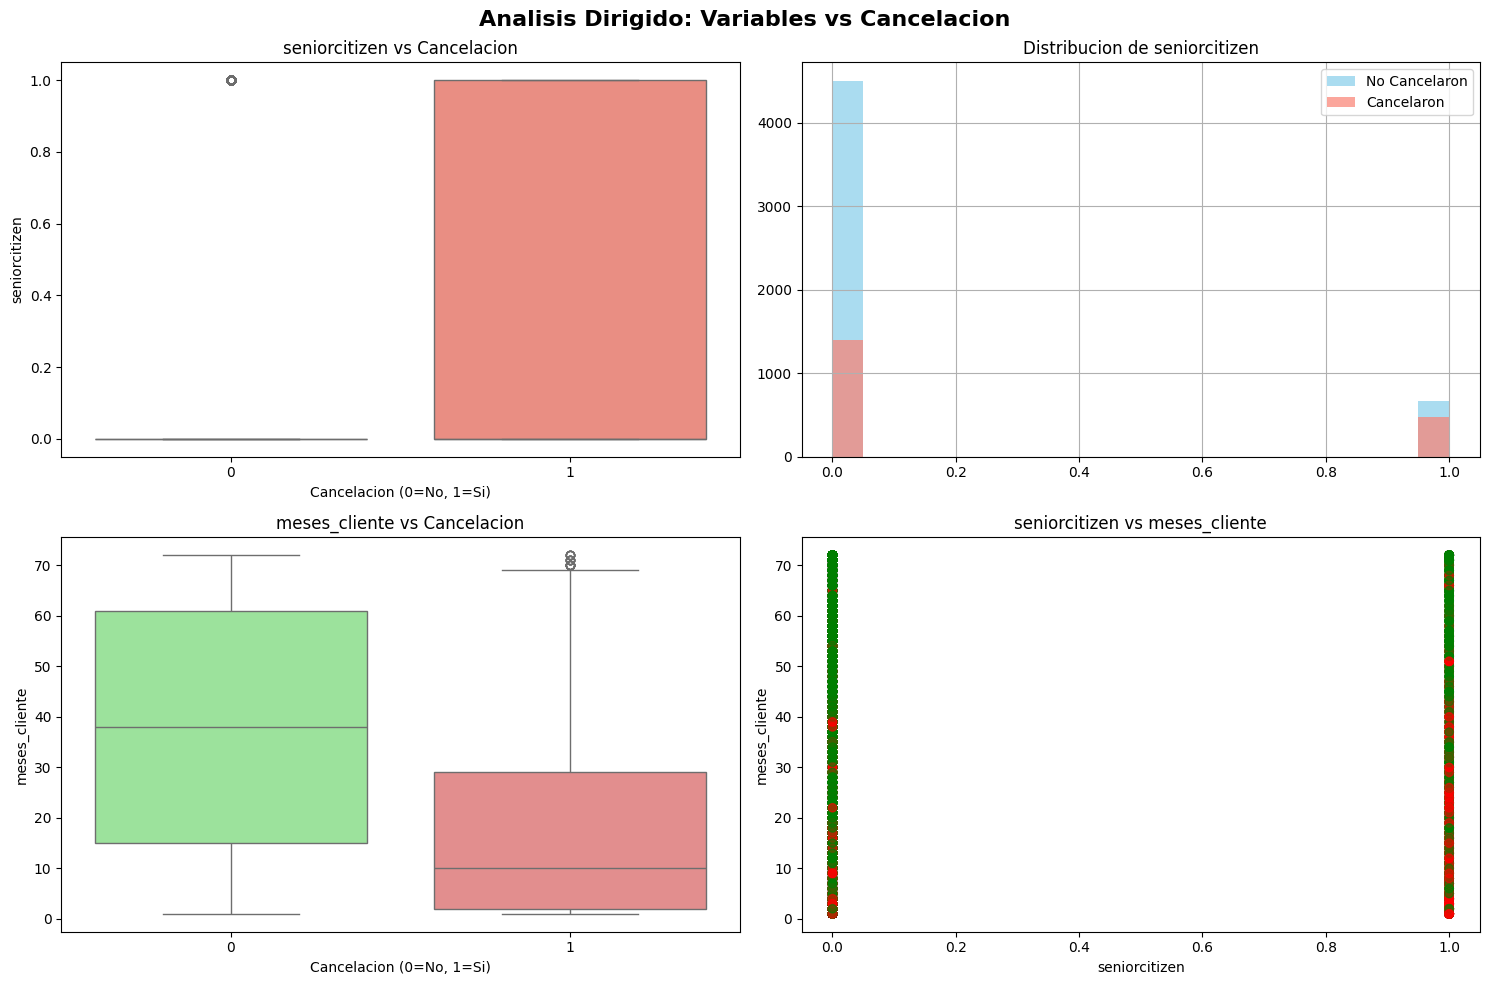


🔍 INSIGHTS DEL ANÁLISIS
📊 meses_cliente: Los clientes que cancelan tienen valor MENOR
   Diferencia: -28.00

💡 RECOMENDACIONES:
   • Analizar patrones en las variables con mayor diferencia
   • Considerar estas variables como features importantes
   • Segmentar clientes según estos patrones


In [14]:
# 🎯 ANÁLISIS DIRIGIDO: VARIABLES ESPECÍFICAS VS CANCELACIÓN
# 🔇 Suprimir warnings de emojis en matplotlib
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
# Primero verificar las columnas disponibles
print("📋 Columnas disponibles en el dataset:")
print(list(df.columns))

# Identificar variables clave para análisis de forma más específica
variables_tiempo = []
variables_gasto = []
variables_contrato = []

# Buscar variables específicas conocidas
for col in df.columns:
    col_lower = str(col).lower()
    if any(keyword in col_lower for keyword in ['meses_cliente', 'tenure']):
        variables_tiempo.append(col)
    elif any(keyword in col_lower for keyword in ['facturacion_total', 'facturacion_mensual', 'charges']):
        variables_gasto.append(col)
    elif any(keyword in col_lower for keyword in ['contrato', 'contract']):
        variables_contrato.append(col)

print(f"\n🔍 Variables identificadas:")
print(f"⏰ Tiempo: {variables_tiempo}")
print(f"💰 Gasto: {variables_gasto}")
print(f"📄 Contrato: {variables_contrato}")

# Solo proceder si encontramos variables
if not variables_tiempo and not variables_gasto and not variables_contrato:
    print("\n⚠️ No se encontraron las variables específicas esperadas.")
    print("💡 Mostrando análisis con las variables numéricas disponibles:")

    # Usar las variables numéricas disponibles
    numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'evasion' in numericas:
        numericas.remove('evasion')

    variables_tiempo = [col for col in numericas if 'encoded' in col or len(numericas) <= 3][:1]
    variables_gasto = [col for col in numericas if col not in variables_tiempo][:1]

    print(f"📊 Usando variables alternativas:")
    print(f"   Variable 1: {variables_tiempo}")
    print(f"   Variable 2: {variables_gasto}")

# Crear análisis solo con variables que existen
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analisis Dirigido: Variables vs Cancelacion', fontsize=16, fontweight='bold')

# 1. Primera variable disponible vs Cancelación
if len(df.select_dtypes(include=[np.number]).columns) > 1:
    numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'evasion' in numericas:
        numericas.remove('evasion')

    if len(numericas) >= 1:
        var1 = numericas[0]

        # Boxplot
        sns.boxplot(data=df, x='evasion', y=var1, palette=['skyblue', 'salmon'], ax=axes[0,0])
        axes[0,0].set_title(f'{var1} vs Cancelacion')
        axes[0,0].set_xlabel('Cancelacion (0=No, 1=Si)')

        # Estadísticas
        val_no_churn = df[df['evasion']==0][var1].median()
        val_churn = df[df['evasion']==1][var1].median()
        print(f"\n📊 {var1.upper()}:")
        print(f"   • No cancelaron - Mediana: {val_no_churn:.2f}")
        print(f"   • Cancelaron - Mediana: {val_churn:.2f}")

        # Histograma comparativo
        df[df['evasion']==0][var1].hist(alpha=0.7, label='No Cancelaron', bins=20,
                                        color='skyblue', ax=axes[0,1])
        df[df['evasion']==1][var1].hist(alpha=0.7, label='Cancelaron', bins=20,
                                        color='salmon', ax=axes[0,1])
        axes[0,1].set_title(f'Distribucion de {var1}')
        axes[0,1].legend()

# 2. Segunda variable si existe
if len(numericas) >= 2:
    var2 = numericas[1]

    # Boxplot
    sns.boxplot(data=df, x='evasion', y=var2, palette=['lightgreen', 'lightcoral'], ax=axes[1,0])
    axes[1,0].set_title(f'{var2} vs Cancelacion')
    axes[1,0].set_xlabel('Cancelacion (0=No, 1=Si)')

    # Estadísticas
    val2_no_churn = df[df['evasion']==0][var2].median()
    val2_churn = df[df['evasion']==1][var2].median()
    print(f"\n📊 {var2.upper()}:")
    print(f"   • No cancelaron - Mediana: {val2_no_churn:.2f}")
    print(f"   • Cancelaron - Mediana: {val2_churn:.2f}")

    # Scatter plot si tenemos 2 variables numéricas
    if len(numericas) >= 2:
        colors = ['green' if x == 0 else 'red' for x in df['evasion']]
        axes[1,1].scatter(df[var1], df[var2], c=colors, alpha=0.6)
        axes[1,1].set_title(f'{var1} vs {var2}')
        axes[1,1].set_xlabel(var1)
        axes[1,1].set_ylabel(var2)

# Si no hay segunda variable, usar otro análisis
else:
    # Análisis de distribución de cancelación
    churn_counts = df['evasion'].value_counts()
    axes[1,0].bar(['No Cancelaron', 'Cancelaron'], churn_counts.values,
                  color=['skyblue', 'salmon'])
    axes[1,0].set_title('Distribucion de Cancelacion')
    axes[1,0].set_ylabel('Cantidad')

    # Porcentajes
    churn_pct = df['evasion'].value_counts(normalize=True) * 100
    axes[1,1].pie(churn_pct.values, labels=['No Cancelaron', 'Cancelaron'],
                  colors=['skyblue', 'salmon'], autopct='%1.1f%%')
    axes[1,1].set_title('Porcentaje de Cancelacion')

plt.tight_layout()
plt.show()

# 📊 RESUMEN DE INSIGHTS
print("\n" + "="*60)
print("🔍 INSIGHTS DEL ANÁLISIS")
print("="*60)

if len(numericas) >= 1:
    diff1 = val_churn - val_no_churn
    if abs(diff1) > 0.01:
        direction1 = "MAYOR" if diff1 > 0 else "MENOR"
        print(f"📊 {var1}: Los clientes que cancelan tienen valor {direction1}")
        print(f"   Diferencia: {diff1:.2f}")

if len(numericas) >= 2:
    diff2 = val2_churn - val2_no_churn
    if abs(diff2) > 0.01:
        direction2 = "MAYOR" if diff2 > 0 else "MENOR"
        print(f"📊 {var2}: Los clientes que cancelan tienen valor {direction2}")
        print(f"   Diferencia: {diff2:.2f}")

print(f"\n💡 RECOMENDACIONES:")
print(f"   • Analizar patrones en las variables con mayor diferencia")
print(f"   • Considerar estas variables como features importantes")
print(f"   • Segmentar clientes según estos patrones")

In [19]:
from sklearn.model_selection import train_test_split

# Supongamos que 'df' es tu DataFrame y 'evasion' es la variable objetivo
X = df.drop(columns=['evasion'])  # Variables predictoras
y = df['evasion']                 # Variable objetivo

# División 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño total:", df.shape[0])
print("Entrenamiento:", X_train.shape[0])
print("Prueba:", X_test.shape[0])


Tamaño total: 7032
Entrenamiento: 4922
Prueba: 2110


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ========================
# 1. División de datos
# ========================
X = df.drop(columns=['evasion'])
y = df['evasion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [21]:
# 2. Modelo con normalización (Regresión Logística)
# ========================
log_pipeline = Pipeline([
    ('scaler', StandardScaler()),              # Normalización
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_test)

print("📊 Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte:\n", classification_report(y_test, y_pred_log))

📊 Regresión Logística
Accuracy: 0.8009478672985783
Matriz de Confusión:
 [[1389  160]
 [ 260  301]]
Reporte:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [22]:
# 3. Modelo sin normalización (Random Forest)
# ========================
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\n🌲 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte:\n", classification_report(y_test, y_pred_rf))


🌲 Random Forest
Accuracy: 0.7819905213270142
Matriz de Confusión:
 [[1379  170]
 [ 290  271]]
Reporte:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔍 Evaluación de {nombre}")
    print("------------------------------------------------")
    print(f"✅ Accuracy : {acc:.4f}")
    print(f"🎯 Precision: {prec:.4f}")
    print(f"📡 Recall   : {rec:.4f}")
    print(f"⚖️  F1-score : {f1:.4f}")
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("\nReporte Completo:\n", classification_report(y_test, y_pred))

    return {"Modelo": nombre, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}

# Evaluar ambos pipelines
resultados = []
resultados.append(evaluar_modelo("Regresión Logística", log_pipeline, X_test, y_test))
resultados.append(evaluar_modelo("Random Forest", rf_pipeline, X_test, y_test))

import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\n📊 Comparación de Modelos")
print(df_resultados)



🔍 Evaluación de Regresión Logística
------------------------------------------------
✅ Accuracy : 0.8009
🎯 Precision: 0.6529
📡 Recall   : 0.5365
⚖️  F1-score : 0.5890

Matriz de Confusión:
 [[1389  160]
 [ 260  301]]

Reporte Completo:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110


🔍 Evaluación de Random Forest
------------------------------------------------
✅ Accuracy : 0.7820
🎯 Precision: 0.6145
📡 Recall   : 0.4831
⚖️  F1-score : 0.5409

Matriz de Confusión:
 [[1379  170]
 [ 290  271]]

Reporte Completo:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           

# 📑 Informe de Evaluación de Modelos de Cancelación de Clientes

## 🔍 Evaluación de Regresión Logística

---

* ✅ **Accuracy** : 0.8009
* 🎯 **Precision**: 0.6529
* 📡 **Recall**   : 0.5365
* ⚖️ **F1-score** : 0.5890

**Matriz de Confusión:**

```
[[1389  160]
 [ 260  301]]
```

**Reporte Completo:**

```
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110
```

---

## 🔍 Evaluación de Random Forest

---

* ✅ **Accuracy** : 0.7820
* 🎯 **Precision**: 0.6145
* 📡 **Recall**   : 0.4831
* ⚖️ **F1-score** : 0.5409

**Matriz de Confusión:**

```
[[1379  170]
 [ 290  271]]
```

**Reporte Completo:**

```
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110
```

---

## 📊 Comparación de Modelos

| Modelo              | Accuracy | Precision | Recall | F1-score |
| ------------------- | -------- | --------- | ------ | -------- |
| Regresión Logística | 0.8009   | 0.6529    | 0.5365 | 0.5890   |
| Random Forest       | 0.7820   | 0.6145    | 0.4831 | 0.5409   |

---

## 📌 Análisis Crítico

* **Mejor desempeño:** La **Regresión Logística** superó ligeramente al Random Forest en todas las métricas principales, especialmente en **accuracy** (0.80 vs 0.78) y **F1-score** (0.589 vs 0.541).

* **Overfitting/Underfitting:**

  * Ningún modelo presenta un **overfitting severo**, ya que la diferencia entre métricas en clases mayoritaria y minoritaria no es extrema.
  * Sin embargo, ambos modelos muestran **underfitting en la clase positiva (cancelación)**, ya que el recall (0.54 en LogReg, 0.48 en RF) indica que muchos clientes cancelados no fueron detectados.
  * Posibles causas: desbalance en los datos (clase negativa más numerosa) y complejidad insuficiente para capturar patrones de cancelación.

* **Acciones recomendadas:**

  * Aplicar **técnicas de balanceo** (SMOTE, undersampling, oversampling).
  * Afinar **hiperparámetros** en Random Forest para mejorar recall.
  * Considerar modelos más complejos (XGBoost, Gradient Boosting) o ensamblados.

---

## 🎯 Conclusión

* El modelo de **Regresión Logística** es el más adecuado en esta primera iteración por su mejor balance entre precisión y recall.
* La clase de **cancelación (1)** requiere mayor atención, ya que ambos modelos presentan baja sensibilidad en su detección.
* Factores clave que deben analizarse en profundidad: características relacionadas con la duración de la relación con el cliente, consumo de servicios y variables demográficas.

**Estrategia de Retención:**

1. Identificar clientes con **alto riesgo de cancelación** mediante el modelo de Regresión Logística.
2. Implementar campañas de **retención personalizada** en este segmento.
3. Aplicar **programas de fidelización** para aumentar la permanencia.
4. Continuar mejorando el modelo mediante balanceo de clases y ajuste de hiperparámetros.
